In [3]:
import pickle as pkl
with open('recent_list.pkl','rb') as file:
    sns_text=str(pkl.load(file))

In [7]:
# 한글 기준 tokenization
from konlpy.tag import Okt  
okt=Okt()  

In [5]:
stop_words = ['가',	'가까스로',	'가령',	'각',	'각각',	'각자',	'각종',	'갖고말하자면',	'같다',	'같이',	'개의치않고',	'거니와',	'거바',	'거의',	'것',	'것과',	'것들',	'게다가',	'게우다',	'겨우',	'견지에서',	'결과에',	'결국',	'결론을',	'겸사겸사',	'고려하면',	'고로',	'곧',	'공동으로',	'과',	'과연',	'관계가',	'관계없이',	'관련이',	'관하여',	'관한',	'관해서는',	'구',	'구체적으로',	'구토하다',	'그',	'그들',	'그때',	'그래',	'그래도',	'그래서',	'그러나',	'그러니',	'그러니까',	'그러면',	'그러므로',	'그러한즉',	'그런',	'그런데',	'그런즉',	'그럼',	'그럼에도',	'그렇게',	'그렇지',	'그렇지만',	'그렇지않으면',	'그리고',	'그리하여',	'그만이다',	'그에',	'그위에',	'그저',	'그중에서',	'그치지',	'근거로',	'근거하여',	'기대여',	'기점으로',	'기준으로',	'기타',	'까닭으로',	'까악',	'까지',	'까지도',	'꽈당',	'끙끙',	'끼익',	'나',	'나머지는',	'남들',	'남짓',	'너',	'너희',	'너희들',	'네',	'넷',	'년',	'논하지',	'놀라다',	'누가',	'누구',	'다른',	'다만',	'다섯',	'다소',	'다수',	'다시',	'다시말하면',	'다음',	'다음에',	'다음으로',	'단지',	'답다',	'당신',	'당장',	'대로',	'대하면',	'대하여',	'대해',	'대해서',	'댕그',	'더구나',	'더군다나',	'더라도',	'더불어',	'더욱더',	'더욱이는',	'도달하다',	'도착하다',	'동시에',	'동안',	'된바에야',	'된이상',	'두번째로',	'둘',	'둥둥',	'뒤따라',	'뒤이어',	'든간에',	'들',	'등',	'등등',	'딩동',	'따라',	'따라서',	'따위',	'따지지',	'딱',	'때',	'때가',	'때문에',	'또',	'또한',	'뚝뚝',	'라',	'령',	'로',	'로부터',	'로써',	'륙',	'를',	'마음대로',	'마저',	'마저도',	'마치',	'막론하고',	'만',	'만약',	'만약에',	'만은',	'만이',	'만일',	'만큼',	'말하자면',	'말할것도',	'매',	'매번',	'메쓰겁다',	'몇',	'모',	'모두',	'무렵',	'무릎쓰고',	'무슨',	'무엇',	'무엇때문에',	'물론',	'및',	'바꾸어말하면',	'바꾸어말하자면',	'바꾸어서',	'바꿔',	'바로',	'바와같이',	'밖에',	'반대로',	'반드시',	'버금',	'보는데서',	'보다더',	'보드득',	'본대로',	'봐',	'봐라',	'부류의',	'부터',	'불구하고',	'불문하고',	'붕붕',	'비걱거리다',	'비교적',	'비길수',	'비로소',	'비록',	'비슷하다',	'비추어',	'비하면',	'뿐만',	'뿐만아니라',	'뿐이다',	'삐걱',	'삐걱거리다',	'사',	'삼',	'상대적으로',	'생각한대로',	'설령',	'설마',	'설사',	'셋',	'소생',	'소인',	'솨',	'쉿',	'습니까',	'습니다',	'시각',	'시간',	'시작하여',	'시초에',	'시키다',	'실로',	'심지어',	'아',	'아니',	'아니나다를가',	'아니라면',	'아니면',	'아니었다면',	'아래윗',	'아무거나',	'아무도',	'아야',	'아울러',	'아이',	'아이고',	'아이구',	'아이야',	'아이쿠',	'아하',	'아홉',	'안',	'않기',	'알',	'알았어',	'앗',	'앞에서',	'앞의것',	'야',	'약간',	'양자',	'어',	'어기여차',	'어느',	'어느것',	'어느곳',	'어느때',	'어느쪽',	'어느해',	'어디',	'어때',	'어떠한',	'어떤',	'어떤것',	'어떤것들',	'어떻게',	'어떻해',	'어이',	'어째서',	'어쨋든',	'어쩔수',	'어찌',	'어찌됏든',	'어찌됏어',	'어찌하든지',	'어찌하여',	'언제',	'언젠가',	'얼마',	'얼마간',	'얼마나',	'얼마든지',	'얼마만큼',	'얼마큼',	'엉엉',	'에',	'에게',	'에서',	'여',	'여기',	'여덟',	'여러분',	'여보시오',	'여부',	'여섯',	'여전히',	'여차',	'연관되다',	'연이서',	'영',	'영차',	'옆사람',	'예',	'예를',	'예컨대',	'예하면',	'오',	'오로지',	'오르다',	'오자마자',	'오직',	'오호',	'오히려',	'와',	'와르르',	'와아',	'왜',	'왜냐하면',	'외에도',	'요만큼',	'요만한',	'요만한걸',	'요컨대',	'우르르',	'우리',	'우리들',	'우선',	'우에',	'운운',	'월',	'위에서',	'위하여',	'위해서',	'윙윙',	'육',	'으로',	'으로서',	'으로써',	'을',	'응',	'응당',	'의',	'의거하여',	'의지하여',	'의해',	'의해되다',	'의해서',	'이',	'이것',	'이곳',	'이때',	'이라면',	'이래',	'이러이러하다',	'이러한',	'이런',	'이럴정도로',	'이렇게',	'이렇게되면',	'이렇게말하자면',	'이렇구나',	'이로',	'이르기까지',	'이리하여',	'이만큼',	'이번',	'이봐',	'이상',	'이어서',	'이었다',	'이와',	'이와같다면',	'이외에도',	'이용하여',	'이유만으로',	'이젠',	'이지만',	'이쪽',	'이천구',	'이천육',	'이천칠',	'이천팔',	'인',	'인젠',	'일',	'일것이다',	'일곱',	'일단',	'일때',	'일반적으로',	'일지라도',	'임에',	'입각하여',	'입장에서',	'잇따라',	'있다',	'자',	'자기',	'자기집',	'자마자',	'자신',	'잠깐',	'잠시',	'저',	'저것',	'저것만큼',	'저기',	'저쪽',	'저희',	'전부',	'전자',	'전후',	'점에서',	'정도에',	'제',	'제각기',	'제외하고',	'조금',	'조차',	'조차도',	'졸졸',	'좀',	'좋아',	'좍좍',	'주룩주룩',	'주저하지',	'줄은',	'줄은모른다',	'중에서',	'중의하나',	'즈음하여',	'즉',	'즉시',	'지든지',	'지만',	'지말고',	'진짜로',	'쪽으로',	'차라리',	'참',	'참나',	'첫번째로',	'쳇',	'총적으로',	'칠',	'콸콸',	'쾅쾅',	'쿵',	'타다',	'타인',	'탕탕',	'토하다',	'통하여',	'툭',	'퉤',	'틈타',	'팍',	'팔',	'퍽',	'펄렁',	'하',	'하게될것이다',	'하게하다',	'하겠는가',	'하고',	'하고있었다',	'하곤하였다',	'하구나',	'하기',	'하기는한데',	'하기만',	'하기보다는',	'하기에',	'하나',	'하느니',	'하는',	'하는것도',	'하는것만',	'하는것이',	'하는바',	'하더라도',	'하도다',	'하도록시키다',	'하도록하다',	'하든지',	'하려고하다',	'하마터면',	'하면',	'하면된다',	'하면서',	'하물며',	'하여금',	'하여야',	'하자마자',	'하지',	'하지마',	'하지마라',	'하지만',	'하하',	'한',	'한다면',	'한데',	'한마디',	'한적이있다',	'한켠으로는',	'한항목',	'할',	'할때',	'할만하다',	'할망정',	'할뿐',	'할수있다',	'할수있어',	'할줄알다',	'할지라도',	'할지언정',	'함께',	'해도된다',	'해도좋다',	'해봐요',	'해서는',	'해야한다',	'해요',	'했어요',	'향하다',	'향하여',	'향해서',	'허',	'허걱',	'허허',	'헉',	'헉헉',	'헐떡헐떡',	'형식으로',	'혹시',	'혹은',	'혼자',	'훨씬',	'휘익',	'휴',	'흐흐',	'흥',	'힘입어',	'이르다',	'낼',	'까닭에',	'함으로써',	'않다면',	'않으면',	'따르는',	'않다',	'미치다',	'알겠는가',	'방면으로',	'하다',	'되어',	'해도',	'인하여',	'못하다',	'아니다',	'없고',	'말하면',	'안된다',	'사람들',	'없다',	'보아',	'아니라',	'수',	'년도',	'가서',	'달려',	'한하다',	'들면',	'들자면',	'같은',	'종합한것과같이',	'서술한바와같이',	'되다',	'외에',	'정도의',	'많은',	'듯하다',	'틀림없다',	'않고',	'몰랏다',	'보면',	'김에',	'편이',	'낫다',	'할수록',	'않는다면',	'않도록',	'이유는',	'후',	'몰라도',	'따름이다',	'생각이다',	'줄',	'지경이다',	'힘이',	'쓰여',	'되는',	'안다',	'n',	'해서','은','는','이','가','도','다']

In [25]:
import re
tokenizer = Okt()
def text_preprocessing(text,tokenizer):
    
    stopwords = stop_words
    
    txt = re.sub('[^가-힣a-z]', ' ', text)
    token = tokenizer.morphs(txt)
    token = [t for t in token if t not in stopwords]
        
    return token

ex_text = sns_text
sns_text_done= text_preprocessing(ex_text,tokenizer)
print(sns_text_done)

# 영어 소문자와 한글을 제외한 모든 문자를 제거
# Okt를 이용해 형태소 분석
# 형태소 분석기를 거쳐 나온 결과들 중 stopwords 리스트에 포함되지 않는 토큰만 반환

['오늘', '지각', '벌점', '먹었네', '내일', '분', '일찍', '일어나야겠다', '공', '스타', '그램', '공', '스타', '공부', '기록', '정시', '파이터', '수험', '생활', '공', '스타', '맞팔', '수험생', '대학생', '수능', '스터디', '플', '래', '스터디', '공부', '일기', '공부자', '극', '열공', 'study', 'studygram', '자퇴생', '자퇴', '자퇴생', '공', '스타', '그램', '수능', '정', '시러', 'mohw', 'kr', 'xa', '수능', 'xa', '앞둔', '분들', '사회', '첫', '발', '내딛는', 'xa', '자립', '준비', '청년', 'xa', '응원', '모아주세요', '첫', '발', '내딛는', '모든', '분', '응원', '합니다', '두', '힘', '내', '이벤트', '참여', '방법', '보건복지부', '인스타그램', '채널', '팔로우', '기존', '팔로워', '들은', '소문내기', '친구', '태그', '응원', '댓글', '달아주세요', '태그', '친구', '팔로우', '많이', '당첨', '확률', '팔로우', '공', '헌', '높을', '수록', '당첨', '확률', '올라갑니다', '이벤트', '경품', '굽네치킨', '고추', '바사삭', '콜라', 'l', '명', '이벤트', '기간', '당첨', '발표', '인스타그램', '피드', '통해', '발표', '보건복지부', 'xa', '수능', '응원', 'xa', '수능', '이벤트', 'xa', '이벤트', 'xa', '팔로우', '이벤트', 'xa', '힘', '내', '요', 'xa', '굽네치킨', 'xa', '이벤트', 'xa', '인스타', '이벤트', 'xa', '수능', 'xa', '수능', 'xa', '팔로우', '수능', '영어', '리스닝', '풀', '고', '있는', '레벨', '리틀', '팍스', '리스닝', '비',

In [20]:
#가장 많이 나온 단어 100개 저장
from collections import Counter
counts = Counter(sns_text_done)
tags = counts.most_common(100)
print(tags)

[('수능', 919), ('이벤트', 626), ('수험생', 617), ('할인', 356), ('고', 229), ('시', 196), ('스타', 182), ('필라테스', 182), ('점', 175), ('문의', 171), ('고생', 168), ('u', 154), ('그램', 147), ('수험표', 143), ('준비', 134), ('공부', 131), ('분', 128), ('d', 128), ('운동', 127), ('입니다', 119), ('동탄', 115), ('만원', 114), ('위해', 108), ('상담', 101), ('공', 100), ('지', 100), ('혜택', 99), ('시험', 96), ('xa', 93), ('원', 93), ('회', 93), ('수학', 87), ('수고', 87), ('헬스', 86), ('위', 86), ('분들', 85), ('선물', 85), ('맞팔', 84), ('카페', 80), ('해', 80), ('응원', 77), ('바디', 77), ('진행', 75), ('모든', 74), ('맛집', 74), ('좋아요', 74), ('프로필', 74), ('당첨', 73), ('끝', 73), ('더', 73), ('목포', 72), ('추천', 71), ('미용실', 71), ('시술', 71), ('기간', 69), ('학년', 69), ('개월', 69), ('헤어', 69), ('합니다', 68), ('팔로우', 67), ('추가', 67), ('머리', 66), ('시작', 65), ('참여', 64), ('전', 64), ('대학', 62), ('대', 61), ('능력', 61), ('이제', 60), ('츠', 60), ('중', 59), ('가능', 59), ('방문', 59), ('내', 58), ('예약', 58), ('전화', 58), ('광주', 58), ('명', 57), ('님', 57), ('휴대폰', 57), ('잘', 56), ('다이어트', 56

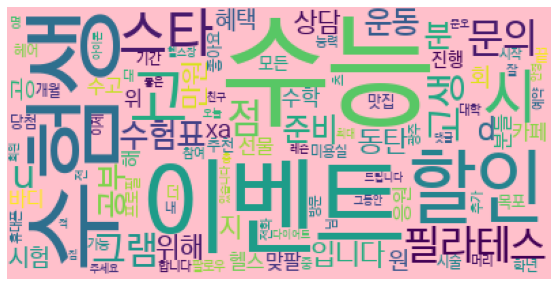

In [24]:
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path='C:\Windows\Fonts\LG PC.ttf',background_color="pink", max_font_size=100)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(18, 5))
plt.axis('off')
plt.imshow(cloud)
plt.show()